## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [1]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [4]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
# 資料的比數
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [7]:
#可以嘗試用範例的程式
print(df_test.isnull().any())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


## A2 : 測試資料集有遺失值

## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [33]:
#合併資料
df_append=df_test.append(df_train, ignore_index=True)
print(df_append.info())
print('cabin 遺失個數=',df_append['Cabin'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
cabin 遺失個數= 1014


In [35]:
# 以 Cabin 為例，先看 Cabin  出現值的特性
print(df_append["Cabin"].value_counts())

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F2                 4
B96 B98            4
                  ..
B102               1
E52                1
A9                 1
A14                1
C95                1
Name: Cabin, Length: 186, dtype: int64


In [38]:
# 遺失的屬於另一類。 
df_append['Cabin'].head(10)
df_append["Cabin"] = df_append['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
df_append["Cabin"].unique()

array(['NoCabin', 'B', 'E', 'A', 'C', 'D', 'F', 'G', 'T'], dtype=object)

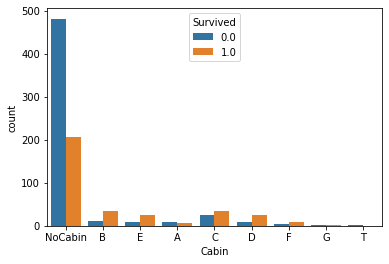

In [40]:
# 挑整後的 Cabin 觀察遺失的樣態
sns.countplot(df_append['Cabin'], hue=df_append['Survived'])
#結論，遺失的死亡率比較高

In [41]:
#數值計算
df_append[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# NoCabin的比例和 T 較接近

,Cabin,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
7,NoCabin,0.299854
8,T,0.000000
